In [32]:
#Importing the necessary libraries

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import cv2
%matplotlib inline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf

In [2]:
# Setting up directories of the training and test images

train_dir = r"\\adir.hull.ac.uk\home\695\695842\Downloads\Emergency_Vehicles\train"
test_dir = r"\\adir.hull.ac.uk\home\695\695842\Downloads\Emergency_Vehicles\test"

In [3]:
# Reading in an image

image = cv2.imread(r"\\adir.hull.ac.uk\home\695\695842\Downloads\Emergency_Vehicles\train\0.jpg")

In [4]:
# Changing the image to human recognizable colors

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

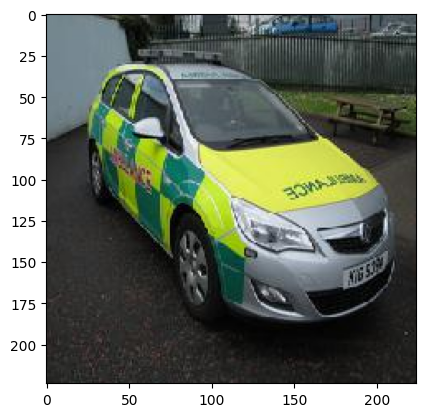

In [5]:
plt.imshow(image)

In [6]:
image.shape

(224, 224, 3)

#### Creating image generators that transform the training and testing data<br>into different orientations to avoid overfitting and to ensure proper <br>evaluation of the models

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
image_gen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.20,
    zoom_range = 0.20,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rescale = 1/255
)

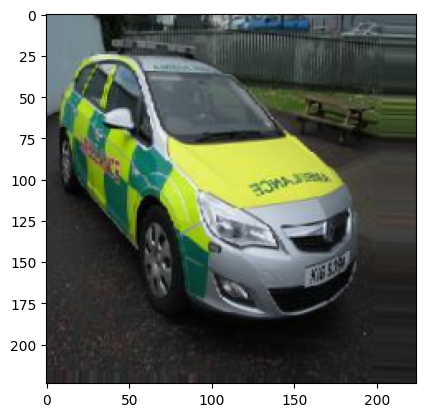

In [9]:
plt.imshow(image_gen.random_transform(image))

In [10]:
train_df = pd.read_csv(r"\\adir.hull.ac.uk\home\695\695842\Downloads\Emergency_Vehicles\train.csv")
test_df = pd.read_csv(r"\\adir.hull.ac.uk\home\695\695842\Downloads\Emergency_Vehicles\test_modified.csv")

In [11]:
test_df['class'] = test_df['class'].astype(str)

In [12]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [13]:
# Changing training labels to string for the train generator

train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [15]:
train_generator = image_gen.flow_from_dataframe(dataframe = train_df[:1150],
                                                directory = train_dir,
                                                x_col = "image_names",
                                                y_col = "emergency_or_not",
                                                class_mode = "binary",
                                                target_size = (224, 224),
                                                batch_size = 50
                                                )
validation_generator = image_gen.flow_from_dataframe(dataframe = train_df[1150:],
                                                     directory = train_dir,
                                                     x_col = 'image_names',
                                                     y_col = 'emergency_or_not',
                                                     class_mode = 'binary',
                                                     target_size = (224, 224),
                                                     batch_size = 50
                                                    )

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


In [16]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

In [17]:
from keras.optimizers import Adam

In [18]:
optimizer = Adam(learning_rate = 3e-4)

#### Building model

In [19]:
model_5 = Sequential()
model_5.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (224, 224, 3), activation = 'leaky_relu', padding = 'same'))
model_5.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'leaky_relu', padding = 'valid'))
model_5.add(MaxPooling2D(pool_size = (2,2)))
model_5.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'leaky_relu'))
model_5.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'leaky_relu'))
model_5.add(MaxPooling2D(pool_size = (2, 2)))
model_5.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'leaky_relu'))
model_5.add(MaxPooling2D(pool_size = (2,2)))
model_5.add(BatchNormalization())
model_5.add(Flatten())

model_5.add(Dense(256, activation = 'relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(1, activation = 'sigmoid'))

#### Compilaiton of models

In [20]:
model_5.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = 'accuracy')

In [21]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

#### Training of models

In [22]:
history_df5 = model_5.fit_generator(train_generator, epochs = 15, validation_data = validation_generator)

C:\Users\695842\AppData\Local\Temp\ipykernel_24020\93252884.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_df5 = model_5.fit_generator(train_generator, epochs = 15, validation_data = validation_generator)


Epoch 1/15
23/23 [==============================] - 159s 7s/step - loss: 0.8322 - accuracy: 0.6713 - val_loss: 0.6670 - val_accuracy: 0.6149
Epoch 2/15
23/23 [==============================] - 154s 7s/step - loss: 0.5915 - accuracy: 0.7183 - val_loss: 0.6470 - val_accuracy: 0.6109
Epoch 3/15
23/23 [==============================] - 155s 7s/step - loss: 0.4945 - accuracy: 0.7652 - val_loss: 0.6565 - val_accuracy: 0.6149
Epoch 4/15
23/23 [==============================] - 152s 7s/step - loss: 0.4372 - accuracy: 0.8070 - val_loss: 0.6443 - val_accuracy: 0.7278
Epoch 5/15
23/23 [==============================] - 151s 7s/step - loss: 0.4269 - accuracy: 0.8026 - val_loss: 0.6449 - val_accuracy: 0.6230
Epoch 6/15
23/23 [==============================] - 152s 7s/step - loss: 0.4060 - accuracy: 0.8183 - val_loss: 0.6367 - val_accuracy: 0.6290
Epoch 7/15
23/23 [==============================] - 153s 7s/step - loss: 0.3869 - accuracy: 0.8339 - val_loss: 0.6197 - val_accuracy: 0.7298
Epoch 8/15
23

#### Plotting graphs of training and validation loss against Epochs to check for overtraining and performance

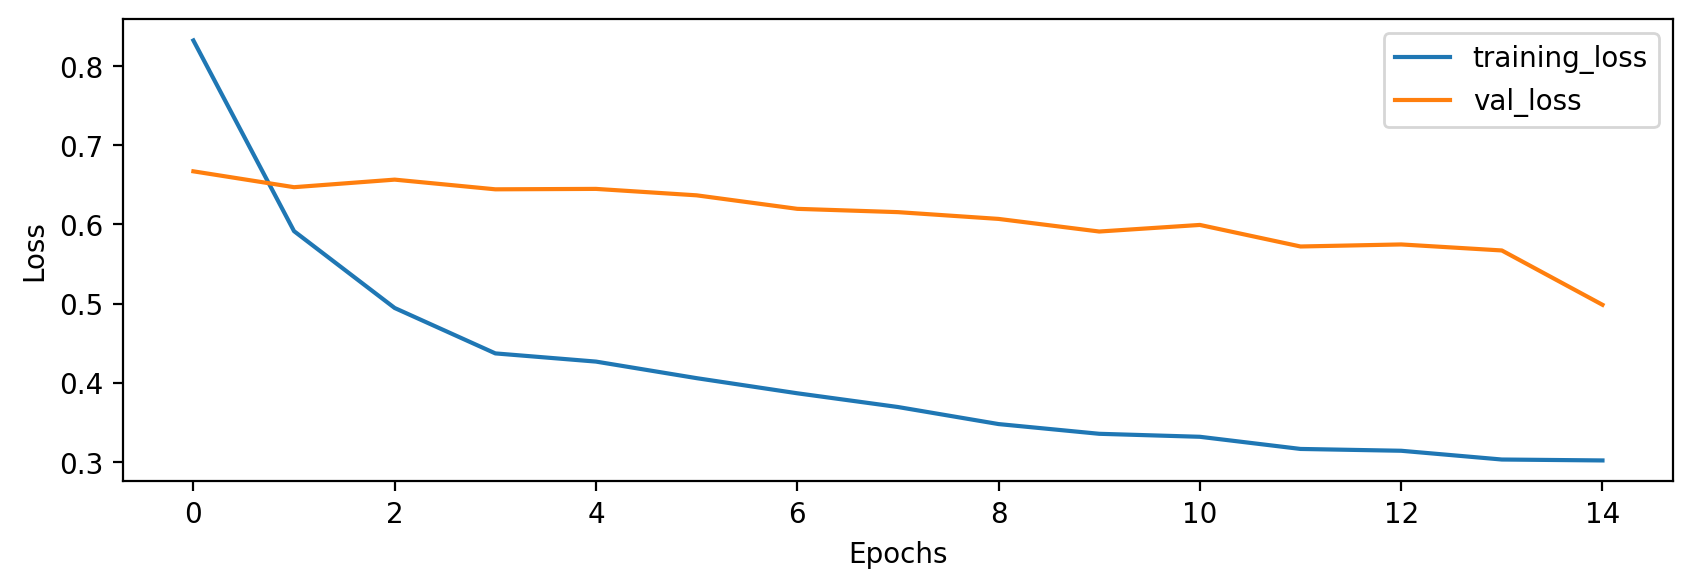

In [23]:
history_df5 = pd.DataFrame(history_df5.history)
plt.figure(dpi = 200, figsize = (10,3))
plt.plot(history_df5['loss'],
        label = 'training_loss')
plt.plot(history_df5['val_loss'],
         label = 'val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Testing the models on test data

In [24]:
# Generating images for testing of the models
test_generator = image_gen.flow_from_dataframe(dataframe = test_df,
                                                directory = test_dir,
                                                x_col = "image_names",
                                                y_col = "class",
                                                class_mode = "binary",
                                                target_size = (224, 224),
                                                batch_size = 700
                                                )

Found 700 validated image filenames belonging to 2 classes.


In [46]:
test_generator[0][0].shape

(700, 224, 224, 3)

In [25]:
preds2 = model_5.predict(test_generator[0][0])

22/22 [==============================] - 19s 867ms/step


In [27]:
"""The output of the predictions would have been put in probabilities from 0 to 1
   To change these to actual label, this function maps every probability less than 0.5 to 0 
   and more than 0.5 to 1"""
def label_preds(arr):
    classif = [1 if x[0]>=0.5 else 0 for x in arr]
    return classif

In [28]:
model_5_preds = label_preds(preds2)

In [29]:
print(classification_report(y_pred=model_5_preds, y_true=test_df['class'].astype(int)))

              precision    recall  f1-score   support

           0       0.59      0.76      0.66       408
           1       0.43      0.24      0.31       292

    accuracy                           0.55       700
   macro avg       0.51      0.50      0.49       700
weighted avg       0.52      0.55      0.52       700



In [40]:
confusion = confusion_matrix(model_5_preds, test_df['class'].astype(int))

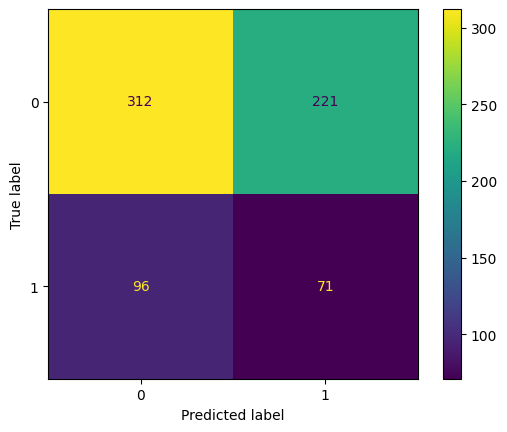

In [41]:
ax = ConfusionMatrixDisplay(confusion)
ax.plot()